In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['axes.titlesize'] = 22  # Font size for plot titles
plt.rcParams['axes.labelsize'] = 16  # Font size for axis labels
plt.rcParams['xtick.labelsize'] = 12 # Font size for x-axis tick labels
plt.rcParams['ytick.labelsize'] = 12 # Font size for y-axis tick labels
%matplotlib inline


%load_ext autoreload
%autoreload 2

# our classes
import ESN as ESN
import EORC as EO

# Echo State Network Examples

## The Mackey-Glass Equation

The Mackey-Glass Equation is delayed differential equation that mimic healthy and pathological behaviors in certain biological contexts. Mackey-Glass equation can be defined as:

$$
\begin{align*}
\frac{dP(t)}{dt} &= \frac{\beta_0 \theta^n P(t-\tau)}{\theta^n + P(t-\tau)^n} - \gamma P(t)
\end{align*}
$$
Where $P(t)$ represents the density over time of the system of study; and $\beta_0$, $\theta$, $n$, $\tau$, and $\gamma$ are parameters.

This equation of is of great interests to our project due to it's chaotic behaviour as $\tau$ is allowed to increase.

In [2]:
dataMg17 = np.loadtxt('data/mackeyGlass/MackeyGlass_t17.txt')

Text(0.5, 0, '$P(t)$')

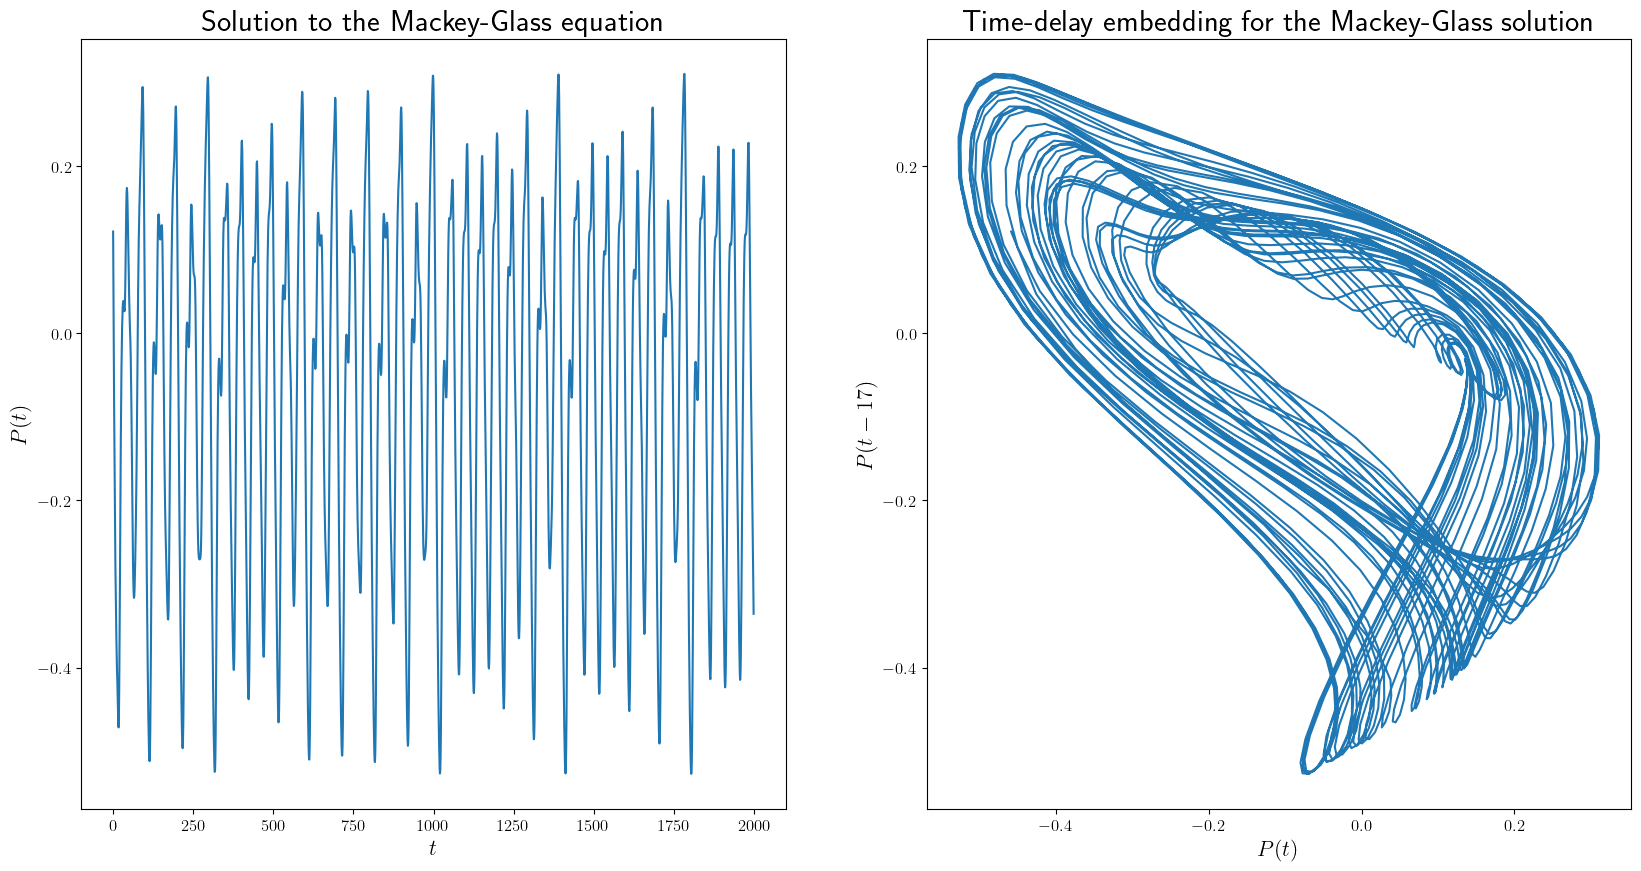

In [3]:
# Delay for chaotic attractor plots

points = 2000

delay = 17

# Plotting training data

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(range(points),dataMg17[:points])
plt.title(r"Solution to the Mackey-Glass equation")
plt.ylabel(r"$P(t)$")
plt.xlabel(r"$t$")

# Plotting attractor

plt.subplot(1,2,2)
plt.plot(dataMg17[delay+ 1:points],dataMg17[:points-(delay + 1)])
plt.title(r"Time-delay embedding for the Mackey-Glass solution")
plt.ylabel(r"$P(t- {})$".format(delay))
plt.xlabel(r"$P(t)$")

Now that we have seen how our data looks like (left figure) and that our attractor is chaotic (Note: need to check if the use of the word "chaotic" is correct), we proceed to implement our neural network to predict the density $P(t)$ of our system.

In [ ]:
# Reshape Mackey-Glass data for training

dataMg17 = np.reshape(dataMg17, (1, dataMg17.shape[0]))

In [4]:
dataMg17.shape

(1, 10000)

In [5]:


# Set the training and testing parameters
res_size = 400
train_legnth = 200
train_skip = 0
test_legnth = 200

# Select data based off training and testing parameters
u_train = dataMg17[:, 0:train_legnth]
y_train = dataMg17[:, 1:train_legnth + 1]
u_test = dataMg17[:, test_legnth ]

# Initialize resevoir
ESN_1 = ESN.ESN(res_size, seed = 125)
ESN_2 = ESN.ESN(res_size, seed = 125)

# Train resevoir
ESN_1.fit(u_train, y_train, method = "ridge", train_skip=train_skip)
ESN_2.fit(u_train, y_train, method = "ols", train_skip=train_skip)

# Run prediction and pull true data
y_test = dataMg17[:, test_legnth + 1 : test_legnth + test_legnth + 1]
y_ridge_predict = ESN_1.predict(u_init=u_test, test_length=test_legnth)
y_ols_predict = ESN_2.predict(u_init=u_test, test_length=test_legnth)




######
# In Progress
###### 
## Initialize resevoir
# EO_RC_1 = EO_RC(res_size, seed = 125)
# EO_RC_2 = EO_RC(res_size, seed = 125)

## Train resevoir
# EO_RC_1.fit(u_train, y_train, method = "ridge", train_skip=train_skip)
# EO_RC_2.fit(u_train, y_train, method = "ols", train_skip=train_skip)

## Run prediction and pull true data
# y_test = dataMg17[:, test_legnth + 1 : test_legnth + test_legnth + 1]
# y_ridge_predict = EO_RC_1.predict(u_init=u_test, test_length=test_legnth)
# y_ols_predict = EO_RC_2.predict(u_init=u_test, test_length=test_legnth)
######

Text(0.5, 0, '$t$')

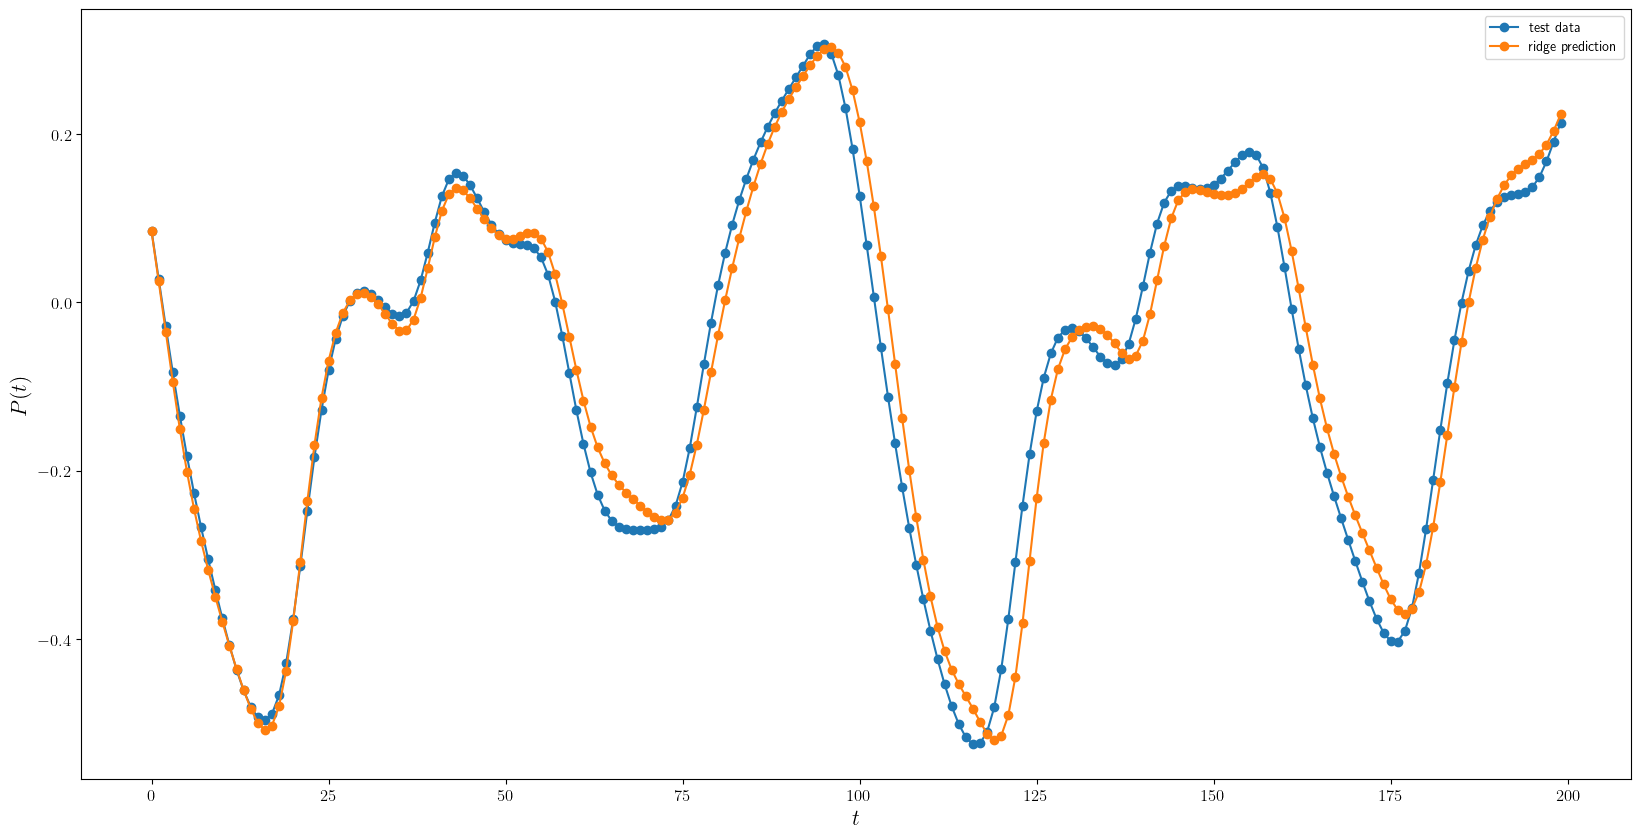

In [6]:
# Plotting training data

plt.figure(figsize=(20,10))
plt.plot(y_test[0],'o-',label='test data')
plt.plot(y_ridge_predict[0],'o-',label='ridge prediction')
plt.legend()
plt.ylabel(r"$P(t)$")
plt.xlabel(r"$t$")

Text(0.5, 0, '$t$')

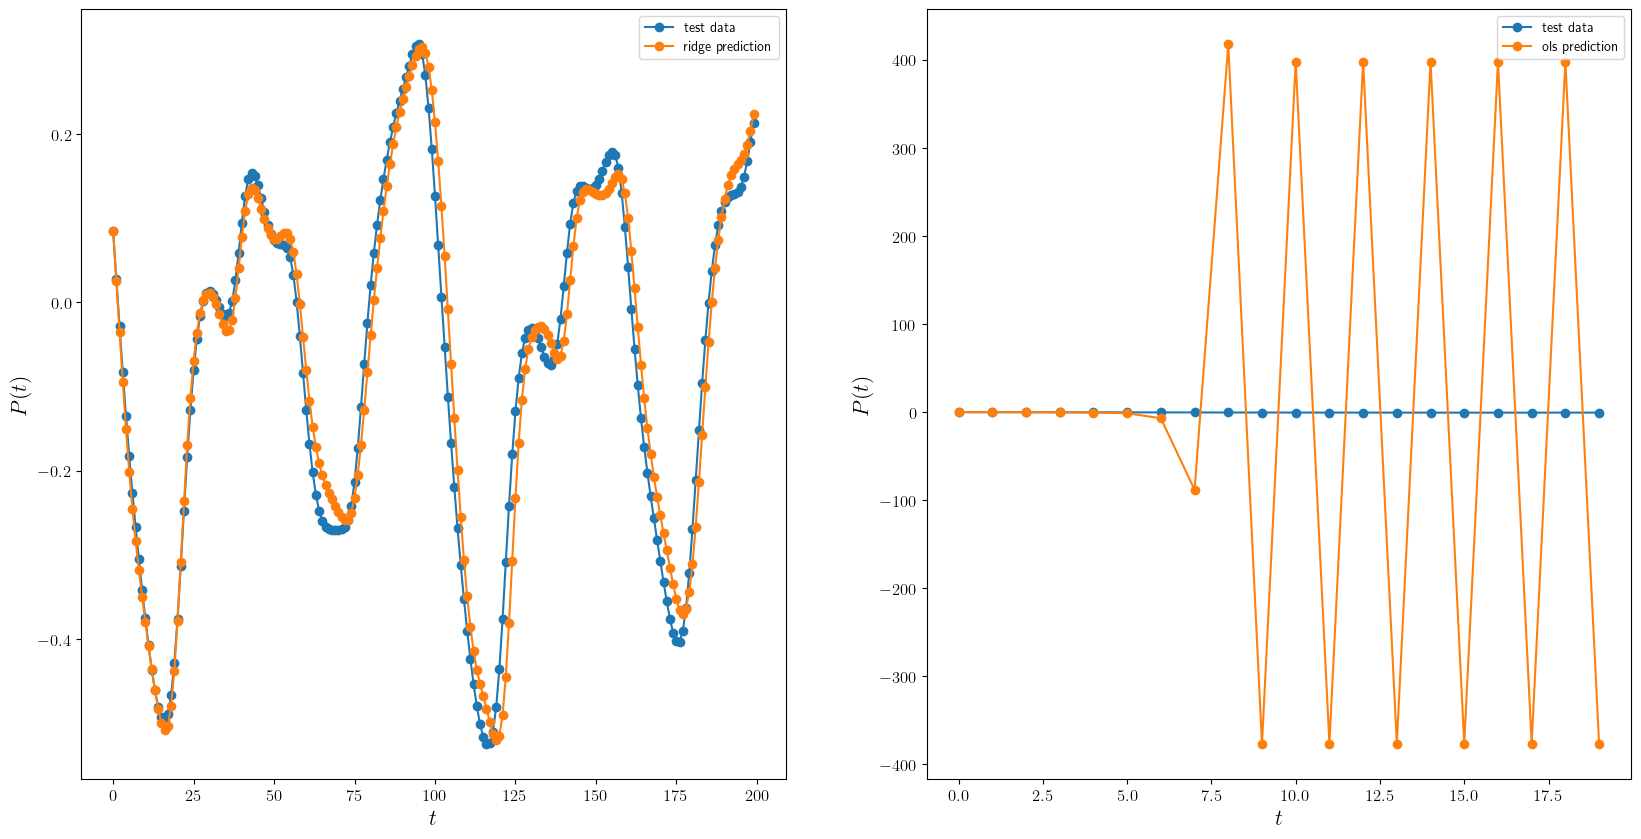

In [49]:
# Plotting training data

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(range(test_legnth),y_test[0],'o-',label='test data')
plt.plot(range(test_legnth),y_ridge_predict[0],'o-',label='ridge prediction')
plt.legend()
plt.ylabel(r"$P(t)$")
plt.xlabel(r"$t$")

# Plotting attractor

t = 20

plt.subplot(1,2,2)
plt.plot(range(t),y_test[0,:t],'o-',label='test data')
plt.plot(range(t),y_ols_predict[0,:t],'o-',label='ols prediction')
plt.legend()
plt.ylabel(r"$P(t)$")
plt.xlabel(r"$t$")

Now we plot the errors of each

In [46]:
# Run errors

mse_ridge_vs_time = np.mean((y_ridge_predict - y_test)**2, axis=0)
mse_ols_vs_time = np.mean((y_ols_predict - y_test)**2, axis=0)

/var/folders/y7/3slnxv4s05v05gc6xzrs2zcm0000gn/T/ipykernel_38116/1178445842.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/y7/3slnxv4s05v05gc6xzrs2zcm0000gn/T/ipykernel_38116/1178445842.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 0, '$t$')

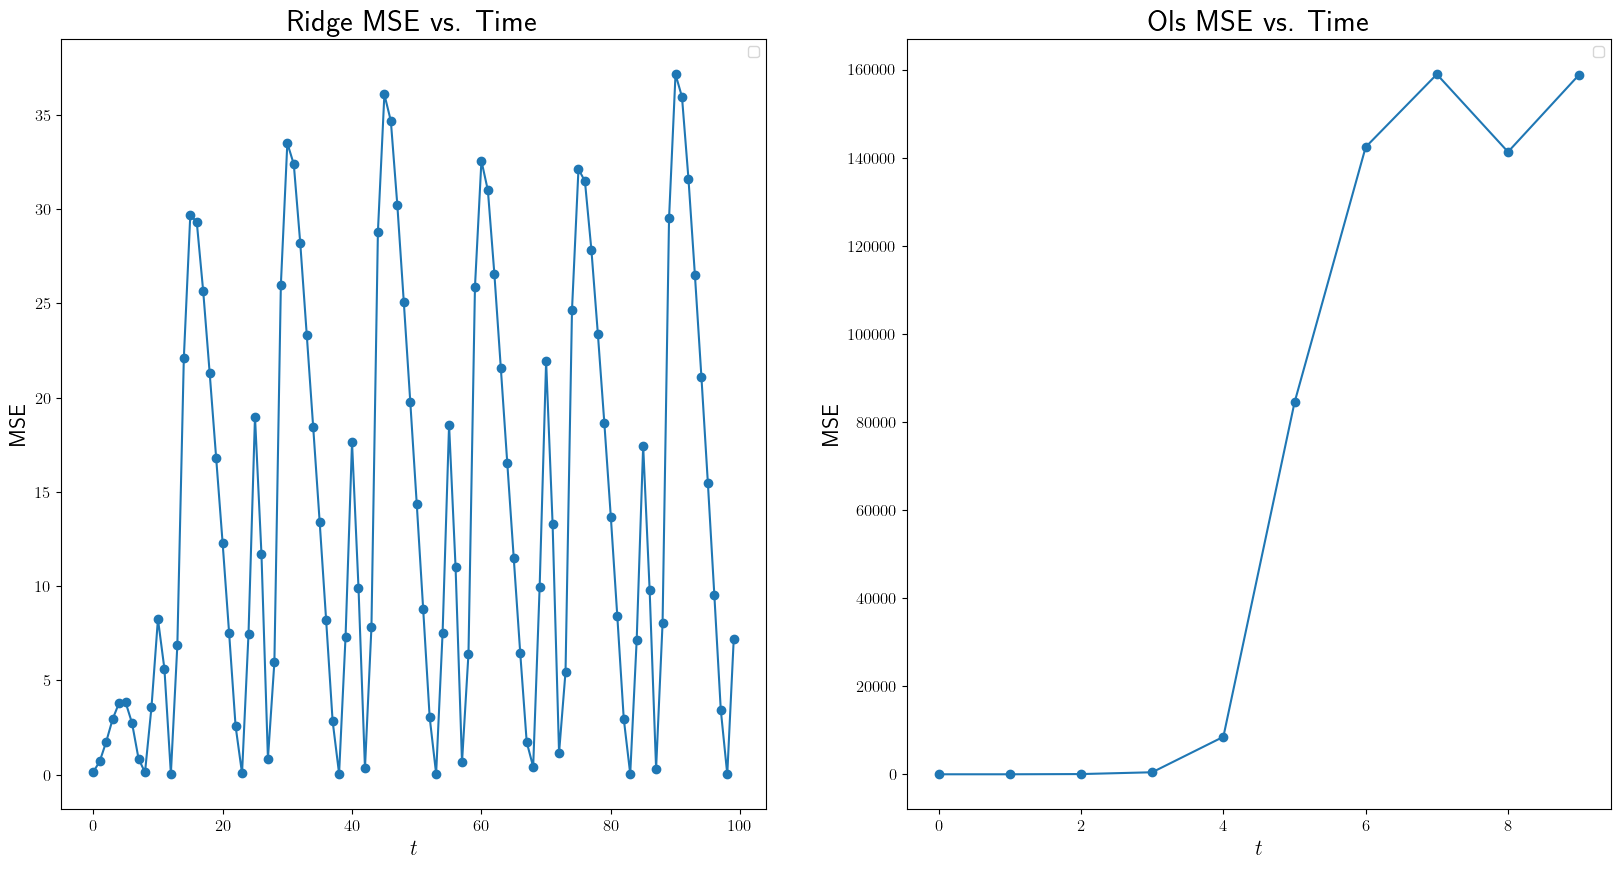

In [47]:
# Plotting error data

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(mse_ridge_vs_time,'o-')
plt.title(r"Ridge MSE vs. Time")
plt.legend()
plt.ylabel(r"MSE")
plt.xlabel(r"$t$")

# Plotting attractor

t = 10

plt.subplot(1,2,2)
plt.plot(mse_ols_vs_time[:t],'o-')
plt.title(r"Ols MSE vs. Time")
plt.legend()
plt.ylabel(r"MSE")
plt.xlabel(r"$t$")

(Note: it would be worth it to discuss why we graphed $P(t)$ vs. $P(t-\tau)$. I read this is a way to see chaos in infinite dimensional systems because in infinite dimensional systems there is not such thing as phase space due to the fact that $x(t)$ is not a point but a funciton in an infinite dimensional space)

Now we proceed to try and predict the Mackey-Glass solutions with the EO-Reservoir Computing

In [14]:
# Set the training and testing parameters
res_size = 100
train_legnth = 200
train_skip = 0
test_legnth = 200

# Select data based off training and testing parameters
u_train = dataMg17[:, 0:train_legnth]
y_train = dataMg17[:, 1:train_legnth + 1]
u_test = dataMg17[:, test_legnth ]

# Initialize resevoir
EORC_1 = EO.EORC(res_size, seed = 125)
EORC_2 = EO.EORC(res_size, seed = 125)

In [15]:
# Train resevoir
EORC_1.fit(u_train, y_train, method = "ridge", train_skip=train_skip)
EORC_2.fit(u_train, y_train, method = "ols", train_skip=train_skip)

# Run prediction and pull true data
y_test = dataMg17[:, test_legnth + 1 : test_legnth + test_legnth + 1]
y_ridge_predict = EORC_1.predict(u_init=u_test, test_length=test_legnth)
y_ols_predict = EORC_2.predict(u_init=u_test, test_length=test_legnth)


Text(0.5, 0, '$t$')

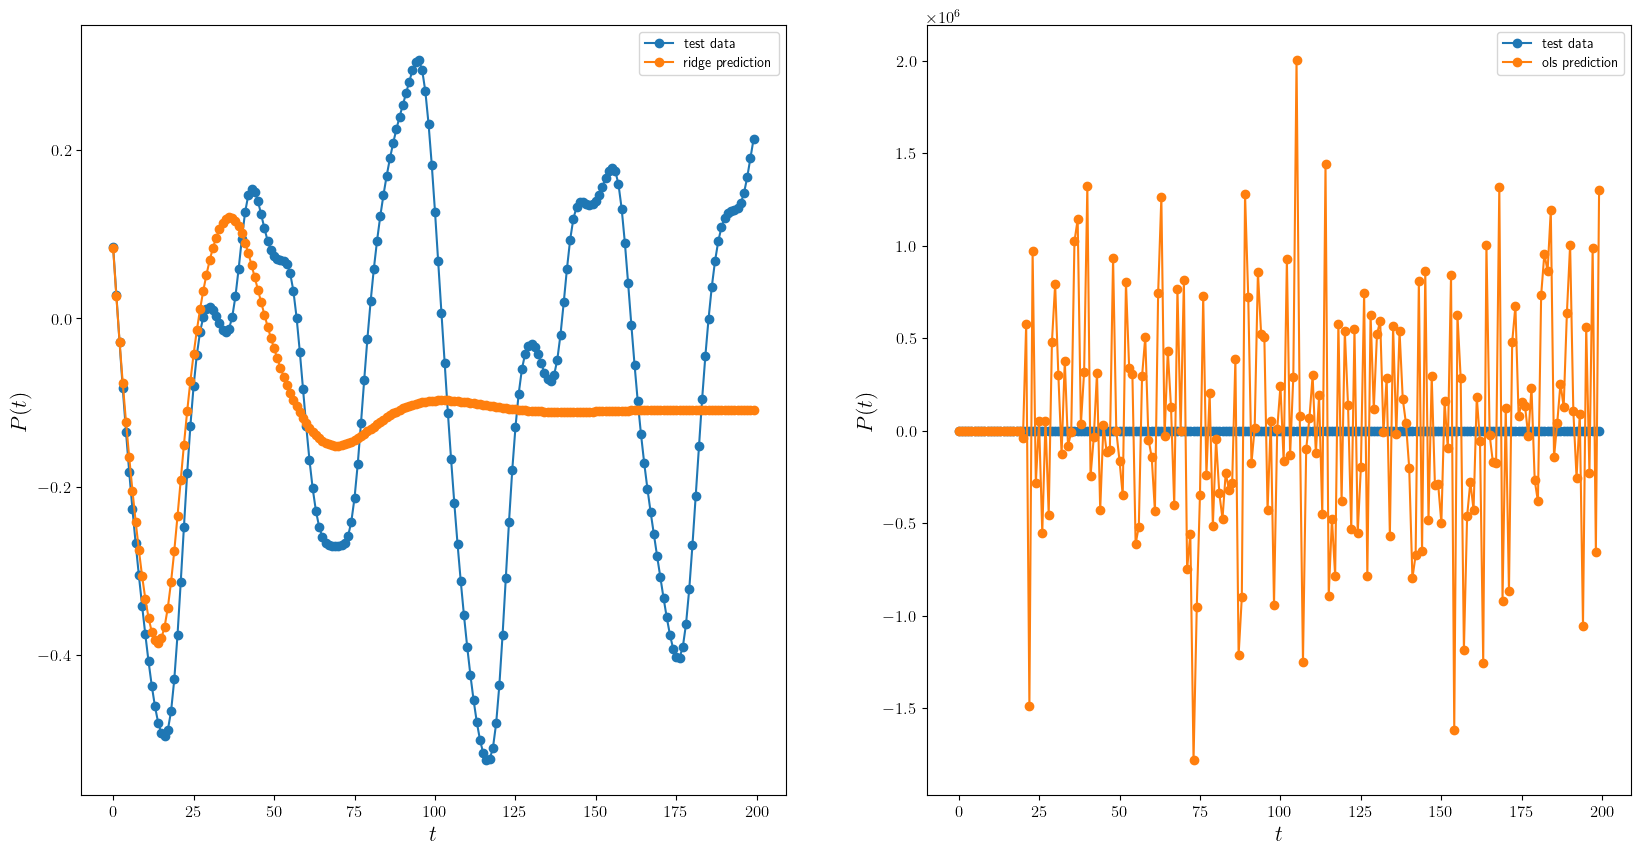

In [16]:
# Plotting training data

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(range(test_legnth),y_test[0],'o-',label='test data')
plt.plot(range(test_legnth),y_ridge_predict[0],'o-',label='ridge prediction')
plt.legend()
plt.ylabel(r"$P(t)$")
plt.xlabel(r"$t$")

# Plotting attractor

t = 200

plt.subplot(1,2,2)
plt.plot(range(t),y_test[0,:t],'o-',label='test data')
plt.plot(range(t),y_ols_predict[0,:t],'o-',label='ols prediction')
plt.legend()
plt.ylabel(r"$P(t)$")
plt.xlabel(r"$t$")